Расстояние до цели  1
Максимальная дальность до цели =  37.500000825  м
Частота биений  59210516.12924344 Гц
Расстояние до цели  1.1101971774233148 м
Отношение сигнал - шум  14047.832241656066


TypeError: cannot unpack non-iterable numpy.float64 object

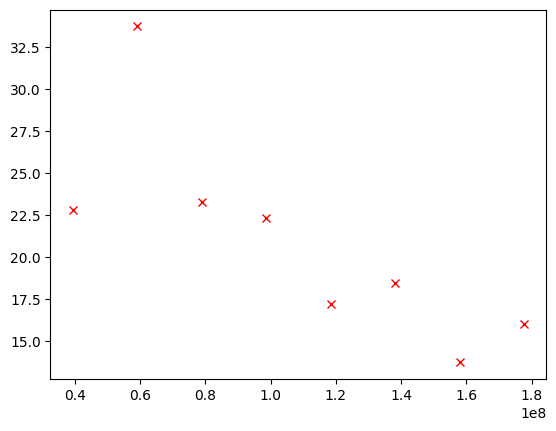

In [2]:
import plotly.graph_objects as go
from IPython.display import clear_output
import LCHM_matan
# Ваш модуль LCHM_matan и другие зависимости ...

colors = ['red', 'green', 'blue', 'skyblue', 'yellow', 'purple', 'orange', 'pink', 'brown', 'black', 'grey']

fig = go.Figure()

i = 0
for noise in range(1, 100, 10):
    x = []
    y = []
    z = []  # для хранения значений OSH
    for r in [1,5,10,20,30,35,40]:
        print("Расстояние до цели ", r)
        LLS = LCHM_matan.LLS()
        a_gen, t_gen = LLS.generator(0)
        a_canal, t_canal = LLS.canal(a_gen, t_gen,r,0)
        a_buger, t_buger = LLS.canal_buger(a_canal,t_canal,0)
        a_buger_bgs, t_buger_bgs = LLS.canal_BGS(a_buger, t_buger,0,noise)
        a_loc, t_loc = LLS.loc_sig_for_photodetector(a_gen,t_canal,0)
        freq, spec, time = LLS.p_detector(a_loc, a_buger_bgs, t_buger_bgs, graf_time = 0, graf_spec = 0)
        R_target =  LLS.find_freq_bien(spec,freq,0)
        print(R_target)
        x.append(r)
        y.append(R_target)
        z.append(R_target)  # добавляем значение OSH в список

    scatter3d = go.Scatter3d(
        x=x,
        y=y,
        z=z,  # добавляем третью координату в график
        mode='markers',
        marker=dict(
            color=colors[i%11],  # добавил цикличность в выбор цветов, т.к. их у вас всего 11
            size=5
        ),
        name="Шум заданный = " + str(noise)
    )

    fig.add_trace(scatter3d)

    clear_output(wait=True)
    fig.show()

    i += 1